In [10]:
# run this cell to import some necessary software
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import sklearn
import seaborn as sns
#from gofer.ok import check
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D 

# set the random seed for reproducibility
np.random.seed(28)

In [11]:
# load the data
attrition = pd.read_csv("data/attrition-renamed.csv", index_col="EmployeeNumber")
# show the first 5 rows
attrition.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole
EmployeeNumber,,,,,,,,,,,,,,,,,
1,41,1,1,Sales,1,2,1,Sales Executive,4,Single,5993,8,1,11,1,6,4
2,49,0,2,Research & Development,8,1,0,Research Scientist,2,Married,5130,1,0,23,3,10,7
4,37,1,1,Research & Development,2,2,0,Laboratory Technician,3,Single,2090,6,1,15,3,0,0
5,33,0,2,Research & Development,3,4,1,Research Scientist,3,Married,2909,1,1,11,3,8,7
7,27,0,1,Research & Development,2,1,0,Laboratory Technician,2,Married,3468,9,0,12,3,2,2


### 9a. The K-Nearest Neighbors Algorithm <a id="section9a"></a>

Imagine you are given a simple classification problem. In this problem, there are two possible classes: red triangles and blue squares.

The next cell will create a plot of the data you're given to start out.

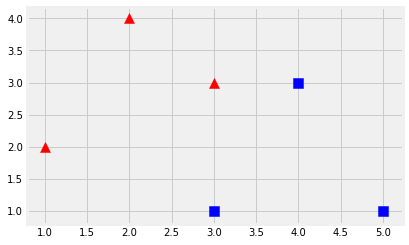

In [12]:
# run this cell to show the toy data
plt.scatter(x=[1, 2, 3], y=[2, 4, 3], c='r', marker='^', s=100)
plt.scatter(x=[4, 5, 3], y=[3, 1, 1], c='b', marker='s', s=100);

Now imagine you are given a new data point to classify. You don't know the correct category, but this new point must be either a red triangle or a blue square. We will represent this unknown new data point with a black circle.

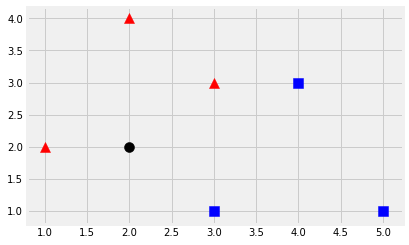

In [13]:
# add the new data point
plt.scatter(x=[1, 2, 3], y=[2, 4, 3], c='r', marker='^', s=100)
plt.scatter(x=[4, 5, 3], y=[3, 1, 1], c='b', marker='s', s=100)
plt.scatter(x=2, y=2, c='k', s=100);

Do you think it's more likely that the new black point is a red triangle or a blue square?

If you're like most people, in the absence of any other information you may have used the **K-Nearest Neighbors** algorithm.

K-Nearest Neighbors (or KNN) picks a class for the new point based on the classes of the closest points- its "neighbors". In this algorithm, "closest" is referring to *Euclidean distance*: the shortest straight-line distance between two points.

The "k" in KNN refers to the number of neighbors that "vote" on the new point's classification. For example, if k=1, the algorithm would find the point closest to the new point...

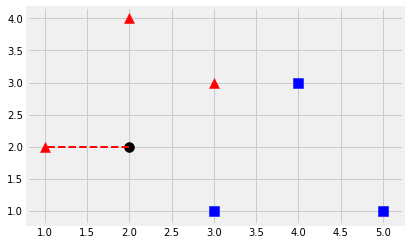

In [14]:
# show the 1 nearest neighbor
plt.scatter(x=[1, 2, 3], y=[2, 4, 3], c='r', marker='^', s=100)
plt.scatter(x=[4, 5, 3], y=[3, 1, 1], c='b', marker='s', s=100)
plt.plot([2, 1], [2, 2], 'r--', linewidth=2)
plt.scatter(x=2, y=2, c='k', s=100);

...and conclude that the new point should be a red triangle, because its neighbor is a red triangle.

If instead k=3, the algorithm would look for the three points closest to the new point...

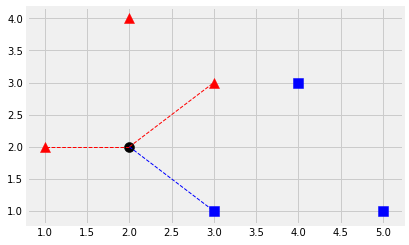

In [15]:
# show the 3 nearest neighbors
plt.scatter(x=[1, 2, 3], y=[2, 4, 3], c='r', marker='^', s=100)
plt.scatter(x=[4, 5, 3], y=[3, 1, 1], c='b', marker='s', s=100)
plt.plot([2, 3], [2, 3], 'r--', linewidth=1)
plt.plot([2, 1], [2, 2], 'r--', linewidth=1)
plt.plot([2, 3], [2, 1], 'b--', linewidth=1)
plt.scatter(x=2, y=2, c='k', s=100);

...and if all three points are weighted equally, it would decide the new point is a red triangle since the majority of the three neighbors are red.

The value of 'k' can make a big difference in the accuracy of the algorithm. Imagine you were asked to classify this new black point:

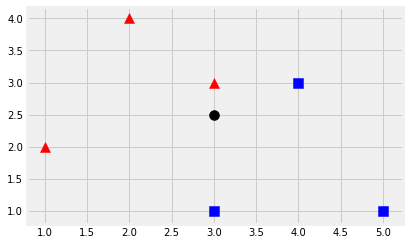

In [16]:
# add the new data point
plt.scatter(x=[1, 2, 3], y=[2, 4, 3], c='r', marker='^', s=100)
plt.scatter(x=[4, 5, 3], y=[3, 1, 1], c='b', marker='s', s=100)
plt.scatter(x=3, y=2.5, c='k', s=100);

<div class="alert alert-warning">
    <b>QUESTION:</b> Using the KNN algorithm, how would this point be classified for $k=1$, $k=2$, and $k=3$? Why could it be a problem to have $k$ be an even number in this case?
    </div>

**YOUR ANSWER HERE** <br>
For k=1, the nearest neighbor for the black circle is a red triangle and hence it would be classified as a red triangle. <br>
For k=2, one of the nearest neighbor is a red triangle while the next nearest neighbor is a blue square and it is a tie. You cannot decide based on the nearest neighbor algorithm
For k=3 however, we have the blue square at (4,3) hence the black circle could be classified as blue square.

### 9b. Using Scikit-Learn: An Example<a id="section9b"></a>

[Scikit-Learn](https://scikit-learn.org/stable/index.html) is free, open-source software for machine learning in Python. The software includes tools to create, train, and evaluate machine learning models.

One of the nice things about Scikit-Learn is that the models all have similar frameworks. If you learn how to train a linear regression model, for example, you can train a classification model by using almost identical code. The general steps are:

1. Choose your explanatory variables (what you're going to use to make predictions) and response variable (what you want to predict) 
1. Split the data into training and testing sets (and, if you're doing a lot of parameter tuning, a validation set)
2. Create a model in Python
3. Fit the data to the model
4. Make predictions using your fitted model
5. Score the accuracy of your model

In Notebooks 07 and 08, we implemented a linear regression model by writing out most of the code by hand. That's a great way to do things while you're learning, but in the future it would be nice to speed things up. Thankfully, Scikit-Learn can help. In this section, we'll show how to create the linear regression model with Scikit-Learn. In the next section, you'll follow the same steps to create a KNN model.

First, we **choose our explanatory and response variables**. The next cells load the bike data, select "temp", "weather", and "month" as the explanatory variables and "total riders" as the response variable, and create a new X DataFrame and y array that only contain our chosen variables.

In [17]:
# run this cell to load the data
bikes = pd.read_csv("data/day_renamed_dso.csv")

# choose explanatory and response variables
expl_vars_bikes = ["temp", "weather", "month"]

resp_var_bikes = "total riders"

In [18]:
# create the X DataFrame
X_bikes = bikes.loc[:, expl_vars_bikes]

# show the first 5 rows
X_bikes.head()

,temp,weather,month
0,0.344167,2,1
1,0.363478,2,1
2,0.196364,1,1
3,0.200000,1,1
4,0.226957,1,1


In [19]:
# create the y array
y_bikes = bikes[resp_var_bikes]

# show the first 5 items
y_bikes.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: total riders, dtype: int64

Next, we **split the data into train and test sets**. This code looks a lot like the code from Notebook 07. Running the cell will put 80% of the data into a training set and the remaining 20% into a test set.

<div class="alert alert-info">
    <b>NOTE</b>: we're not using a validation set here for simplicity, and because we're not adjusting model parameters. If we were going through a full model selection process, including experimenting with what features to use in our model, we would absolutely want to use a validation set as in Notebook 08.
    </div>

In [28]:
# split the data into training and test sets
X_train_bike, X_test_bike, y_train_bike, y_test_bike = train_test_split(X_bikes, y_bikes, 
                                                                        train_size=0.8, test_size=0.2)
print ("X_train=",X_train_bike.describe())
print ("X_test=", X_test_bike.describe())
print ("y_train=",y_train_bike.describe())
print ("y_test=", y_test_bike.describe())

X_train=              temp     weather       month
count  584.000000  584.000000  584.000000
mean     0.502910    1.390411    6.556507
std      0.182944    0.547858    3.410240
min      0.059130    1.000000    1.000000
25%      0.343333    1.000000    4.000000
50%      0.510417    1.000000    7.000000
75%      0.663542    2.000000   10.000000
max      0.861667    3.000000   12.000000
X_test=              temp     weather       month
count  147.000000  147.000000  147.000000
mean     0.465490    1.414966    6.374150
std      0.181016    0.534348    3.621116
min      0.127500    1.000000    1.000000
25%      0.309583    1.000000    3.000000
50%      0.446667    1.000000    6.000000
75%      0.625833    2.000000    9.500000
max      0.849167    3.000000   12.000000
y_train= count     584.000000
mean     4513.477740
std      1905.894364
min        22.000000
25%      3214.000000
50%      4510.000000
75%      5997.250000
max      8714.000000
Name: total riders, dtype: float64
y_test= count  

Step three is to **create the model**. The next cell imports the LinearRegression model code from Scikit-Learn, then creates a new model.

A Scikit-Learn model is a Python *object*. To work with a Python object, it can help to conceive of it like a real-life object. Once a real-life object (like a cell phone) is created, it has a set of attributes associated with it (like the manufacturer, model, and storage capacity) and a set of functions it can perform (play music, send email, look up directions...).

Once a Scikit-Learn model is created (on the cloud server), it has a set of attributes associated with it (like the kind of algorithm it uses and whether or not it normalizes data) and a set of functions it can perform (its methods: it can be fitted to a data set, make predictions, and evaluate the accuracy of its predictions). Another example is the DataFrame object that we've been working with for several notebooks. DataFrames have attributes like shape and column names, and they have many functions they can perform, like selecting columns, filtering rows, and manipulating values.

After the model code is imported, we can create a new model. The arguments inside the model creation function call set some of the *hyperparameters*- features of the model that are chosen regardless of the data. In this case, we're using the defaults, which fit an intercept term and don't normalize the training data.

<div class="alert alert-info">
<b>NOTE:</b> we have included the <code>fit_intercept</code> and <code>normalize</code> arguments here to make it clear that hyperparameters are being set when you create the model. Because we are setting the hyperparameters to their default values, the code in the next cell will create exactly the same base model as if we had included no arguments at all (i.e. if the expression was <code>LinearRegression()</code>)</div>

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=True, normalize=False)


Now, the "raw" model can be fit to the training data using the `fit` method. This method takes two arguments: the features in the training X matrix and the labels as listed in the training y array.

In [ ]:
lr_model.fit(X_train_bike, y_train_bike)

What just happened? 

Behind the scenes, the `fit` method carried out all the steps we went through by hand in Notebook 07: adding an intercept term and using ordinary least squares to calculate $\beta$.

Once the model is fit, it has "learned" how to predict total riders based on the features we gave it (month, temperature, and weather). If it is given a matrix of those three features in its `predict` method, it will give back an array of total rider prediction numbers for each row in the matrix.

Using `predict` is the equivalent of taking the dot product by hand, as we did in Notebook 07 using `@`.

In [ ]:
# save the predictions to a variable
lr_predictions = lr_model.predict(X_test_bike)
# show the predictions
lr_predictions

Additionally, our model has a `score` method, which gives information about how well it is doing its prediction task. The `score` method takes as arguments a matrix of feature data (with columns temperature, weather, and month, since those are what it's been trained on) and an array of labels so it can check its answers. The number it returns is a bit different for different types of models. For linear regression, the number is the *coefficient of determination*, aka $r^2$. You can double-check what `score` returns by checking out the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)- scroll down to see the list of methods and read more abotu `score`.

To sum up, the best possible value of $r^2$ is 1 and the worst is 0.

In [ ]:
# save the score to a variable
lr_score = lr_model.score(X_test_bike, y_test_bike)
# show the score
lr_score

### 9c. Using Scikit-Learn: KNN <a id="section9c"></a>

Now it's time to return to our IBM employee attrition data set, to see if we can use a k-nearest neighbors model to predict whether or not an employee will leave the company. This section will follow the steps in section 9b very closely- if you're stuck, check the LinearRegression code for some hints.

As a reminder, here's what our attrition data looks like:

In [ ]:
# the first five rows of the attrition data
attrition.head()

Remember, our steps are:

1. Choose your explanatory variables (what you're going to use to make predictions) and response variable (what you want to predict) 
1. Split the data into training and testing sets 
2. Create a model in Python
3. Fit the data to the model
4. Make predictions using your fitted model
5. Score the accuracy of your model

Start by choosing explanatory and response variables. For this exercise, we'll try predicting attrition based on **monthly income**, **number of years in current role**, and **overtime eligibility**.

<div class="alert alert-warning">
    <b>EXERCISE</b>: Choose explanatory and response variables.
    <ul>
        <li>explanatory variables must be numerical feature column names that could help predict attrition. For this exercise, we'll be using the columns with data on the employee's monthly income, years in current role, and overtime status. The names should be strings (i.e. inside quotation marks), listed within the square brackets and separated by commas</li>
        <li>the response variable should be the name of the column that says whether or not an employee left by attrition, inside quotation marks</li>
    </ul>
    </div>

In [ ]:
# choose explanatory and response variables
expl_vars_attrition = ["MonthlyIncome", "YearsInCurrentRole", "OverTime"]  

resp_var_attrition = "Attrition"
#type(resp_var_attrition)
#type(expl_vars_attrition)

In [ ]:
# run this cell to check your answer for some common mistakes
check("tests/vars.ok")

Now, split the data into training and test sets. If you've chosen your variables correctly, you can just run the next few cells. The training data will be called `X_train_att` and `y_train_att`, while the test data will be called `X_test_att` and `y_test_att`.

In [ ]:
# once you've chosen your variables, just run this cell
# create the X DataFrame
X_attrition = attrition.loc[:, expl_vars_attrition]

# show the first 5 rows
X_attrition.head()

In [ ]:
# once you've chosen your variables, just run this cell
# create the y array
y_attrition = attrition[resp_var_attrition]

# show the first 5 items
y_attrition.head()

In [ ]:
# once you've chosen your variables, just run this cell
# split the data into training and test
X_train_att, X_test_att, y_train_att, y_test_att = train_test_split(X_attrition, y_attrition,
                                                                    train_size=0.8, test_size=0.2)

The next step is to create the KNN model. The first line of the next cell imports the code for the model, which is called `KNeighborsClassifier`. For now, we'll use the default number of neighbors, which is 5.

<div class="alert alert-warning">
    <b>EXERCISE:</b> Create the KNN model. Replace the ellipses with a model creation call expression, which is the model type followed by parentheses (don't put anything in the parentheses to use the default number of neighbors). We will assign the created model the name of <code>knn</code> using an equals sign.
    </div>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# create the KNeighborsClassifier
knn = KNeighborsClassifier()     # Default k=5 hence not passing this as argument here..


In [ ]:
# run this cell to check your answer for some common mistakes
check("tests/model.ok")

With the model created, it can now be fit. 

<div class="alert alert-warning">
    <b>EXERCISE:</b> Fit the KNN model to the training data. Use the <code>fit</code> method on the model to train it. <code>fit</code> takes two arguments: the training feature matrix (<code>X_train_att</code>) and the list of classes for the training data (<code>y_train_att</code>).
    </div>

In [ ]:
# fit the knn model to the training data
# look at the code for the linear regression model for a hint

knn.fit(X_train_att, y_train_att)

A fitted model can make predictions. Use the fitted model's `predict` to predict attrition for the test data. `predict` takes only one argument: an X matrix of feature data with the same features (columns) that it was trained on.

<div class="alert alert-warning">
    <b>EXERCISE:</b> Use <code>knn.predict</code> to make predictions for the test data (<code>X_test_att</code>). Check the code for the linear regression model predictions for a hint on how the code expression should look.
    </div>

In [ ]:
# use the fitted knn model to predict attrition for the test data
# look at the code for the linear regression model for a hint
# save the predictions to a variable
# and then show the predictions

knn_predictions = knn.predict(X_test_att)
knn_predictions

In [ ]:
# run this cell to check your answer for some common mistakes
check("tests/pred.ok")

Finally, let's evaluate the model. 

For KNN, the `score` method [returns the mean accuracy on the data and labels](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score). Put another way, the score for KNN is the proportion of employees correctly labeled by the model- the number of correctly labeled employees divided by the total number of employees. So, a score of 1.0 indicates a perfect model, and a score of 0.0 indicates a model that got all classifications wrong.

<div class="alert alert-warning">
    <b>EXERCISE:</b> Use the model's <code>score</code> method to evaluate its accuracy on the test data. <code>score</code> requires 2 arguments: a matrix of feature data (X) and an array of response variables (y).
    </div>

In [ ]:
# use the fitted knn model to score predictions for the test data
# look at the code for the linear regression model for a hint
# save the score to a variable

knn_score = knn.score(X_test_att,y_test_att)

# show the score
knn_score

In [ ]:
# run this cell to check your answer for some common mistakes
check("tests/score.ok")

#### Visualization
When evaluating the KNN model, it can also be helpful to visualize the data so we can see the scope of the problem we're trying to solve. 

The following scatter plots plot our explanatory variables against each other. Every point represents a single employee, and the color and shape of the point indicate whether or not they left IBM: an orange circle indicates attrition and a blue triangle indicates the employee remained at IBM.

Because KNN assumes that points of the same class are near to each other, the ideal KNN scatter plot would have all points of the same type located next to each other on the plot. 

This plot shows monthly income and years in current role:

In [ ]:
# make the plots bigger
sns.set(rc={'figure.figsize':(11,8)})

# create the scatter plot
sns.scatterplot(x=attrition["MonthlyIncome"], 
                # add a bit of jitter to YearsInCurrentRole so the points overlap less
                y=attrition["YearsInCurrentRole"] + np.random.normal(scale = 0.3, size=attrition.shape[0]), 
                data=attrition,
                hue="Attrition", style="Attrition", markers={0:"^", 1:"o"}, palette={0:"#003262", 1:"#FDB515"});

Sometimes, adding a third dimension can make a difference for the KNN algorithm. The next plot shows all three of our chosen explanatory variables: monthly income, years in current role, and overtime. Note that overtime is a binary value (employees are either eligible for overtime or not), so the overtime axis splits the points into two planes (one for each possible value of "OverTime").

In [ ]:
# make the 3D scatter plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

att_pos = attrition[attrition.Attrition == 1]
att_neg = attrition[attrition.Attrition == 0]

x_label = "YearsInCurrentRole"
y_label = "MonthlyIncome"
z_label = "OverTime"

for data, m , l, c in [(att_neg, "^", "Attrition = 0", "#003262"), (att_pos, "o", "Attrition = 1", "#FDB515")]:
    ax.scatter(data[x_label], data[y_label], (data[z_label] + np.random.normal(scale=0.05,size=data.shape[0])), 
               marker=m, label=l, color=c)

ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
ax.set_zlabel(z_label)

plt.legend();

<div class="alert alert-warning">
    <b>QUESTION:</b> based on the model score, how well is our classifier working? Based on the scatter plot, who are the people most likely to be mis-classified, and how can you tell (hint: think about how KNN makes predictions)?
    </div>

**YOUR ANSWER HERE** <br>
This classifier model is good. KNN score is more than 0.8. <br>
The people most likely to be mis-classified are the ones having options for over-time as that feature plot for "Overtime" is least homogeneous, 

#### References
- [IBM HR Analytics Employee Attrition & Performance mock data set](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/home) is made available under the [Open Database License](http://opendatacommons.org/licenses/odbl/1.0/). Any rights in individual contents of the database are licensed under the [Database Contents License](http://opendatacommons.org/licenses/dbcl/1.0/).